

# EDA for the Women in STEM dataset  
                
### Data Description

Data is originally from American Community Survey 2010-2012 Public Use Microdata Series. The dataset consists of 75 STEM major studies divided into 5 categories. It also gives the number of men and women in each major along with the median salary and the proportion of women(ShareWomen) in each STEM major.

### Goal

The goals of this course are: 
1. To gain powerful insights into data that aren't obvious with statistics.
2. Business and non-technical audience are able to comprehend the results.
3. Useful for stories so peer data scientists can understand the analysis.

### Libraries

In this course, we will learn how to use pandas to read data, use Matplotlib for data visualization, and use scikit-learn to build linear regression model. 



### Reading into a Dataframe

Dataframes are a part of the library called Pandas. One of the versatile features of pandas dataframe is that, it can read the data by just specifying the link in the read_csv() function.

#### Exercise
1. One of the useful commands that is useful to list the first few rows is the head function which takes in number of rows to be listed in the top-down order.
2. List first few rows of the women_url dataframe using the .head() function and assign it to women_sample. How many rows does the .head() show up?

In [101]:
import pandas as pd
women_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/women-stem.csv"
data = pd.read_csv(women_url)

#Write your code here
women_sample = data.head()

In [111]:
#this is assertion block which verifies the solution.
import numpy as np
try:
    def verify_answer():
        """
        enter your verification code here.
        return true if your checks pass
        eg: 
        if above_user_answer_var > 100: 
            return True
        else:
            return False
        """
        if women_sample.shape == (5, len(data.columns)):            
            return True
        else:
            return False
    ref_assert_var = verify_answer()
except Exception as e:
    print('Your assertion block throws error: ' + str(e))
else:
    if ref_assert_var:
        print('continue')
    else:
        print('The answer did not pass the test.')

continue


### Women in STEM dataset - EDA

The data and target are present as properties in the data. Women in STEM dataset is present as independent variables in data and the ShareWomen rate in target property.

The task is to model the median value of the ShareWomen rate given all the factors. Some factors could affect the ShareWomen rate and some may not.

#### Scatter Plots or Joint plots using seaborn

To visualize how each factor would affect ShareWomen rate, we can run a scatter plot of the ShareWomen rate for each dependent variable. This will help visualize how the target vector may be affected by each factor. Later we shall study quantitave methods that can provide us methods to measure how each factor affects the output or if it doesnt affect the output at all.


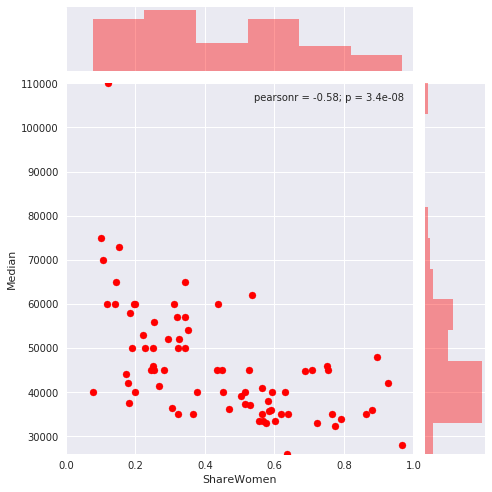

In [118]:
import seaborn as sns
g = sns.jointplot("ShareWomen", "Median", data=data, xlim=(0, 1), ylim=(26000, 110000), color="r", size=7)

From the above plot we can observe that the median value of the ShareWomen in Boston peaks at highest median which makes logical sense. This is one of the goals of EDA; to discover patterns in scatter plots and make sense of the input variables. The input variables are also called indepedent variables since they affect the value of the target variable, which is called the dependent variable.

Instructions
1. Generate a joint plot of ShareWomen vs women and assign the plot to variable g as shown in the demo code below.
2. What is your interpretation of the scatter plot?

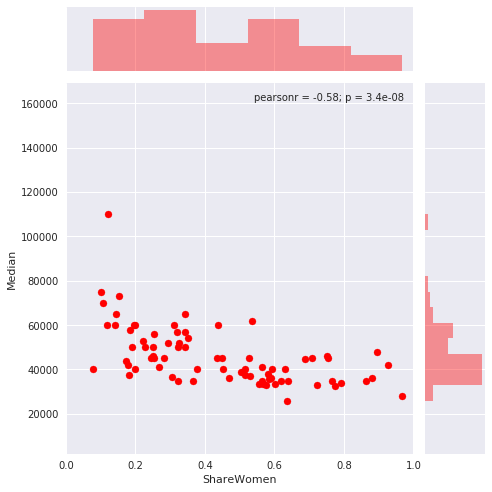

In [167]:
#Modify this to plot MEDV vs Lower status of the population.
g = sns.jointplot("ShareWomen", "Median", data=data, xlim=(0, 1), ylim=(2000, 168947), color="r", size=7)

#write your code here


### Categorical Variables

Categorical variables are variables that can take a value in a fixed set. For example, Major_category,
    
    Major_category = ['Engineering', 'Physical Sciences', 'Computers & Mathematics', 'Health', 'Biology & Life Science']

Certain Machine Learning algorithms cannot make sense of the categorical variables such as Major_category. Hence, we need to transform them to numbered codes that represent such unique values. To do so, we can use dummy variables. Dummy variables transform the day of the week to a value:

In [124]:
major_dummies = pd.get_dummies(data['Major_category'])
major_dummies

,Biology & Life Science,Computers & Mathematics,Engineering,Health,Physical Sciences
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0
5,0,0,1,0,0
6,0,0,0,0,1
7,0,0,1,0,0
8,0,0,1,0,0
9,0,0,1,0,0


You can see that there are as many columns as there are unique values in the categorical variable. Also each categorical variable such as Monday, Tuesday have unique set of 1s and 0s.

### Exercise

Transform the 'Major_category' column to a categorical variable and append to the dataframe, checks.

In [126]:
# Add code to create a new dummy variable out of Major_category column and append to checks data frame.
major_dummies = pd.get_dummies(data['Major_category'])
data = pd.concat([data, major_dummies], axis=1)
data

,Rank,Major_code,Major,Major_category,Total,Men,Women,ShareWomen,Median,Biology & Life Science,Computers & Mathematics,Engineering,Health,Physical Sciences
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,2057,282,0.120564,110000,0,0,1,0,0
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,679,77,0.101852,75000,0,0,1,0,0
2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,725,131,0.153037,73000,0,0,1,0,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135,0.107313,70000,0,0,1,0,0
4,5,2418,NUCLEAR ENGINEERING,Engineering,2573,2200,373,0.144967,65000,0,0,1,0,0
5,6,2405,CHEMICAL ENGINEERING,Engineering,32260,21239,11021,0.341631,65000,0,0,1,0,0
6,7,5001,ASTRONOMY AND ASTROPHYSICS,Physical Sciences,1792,832,960,0.535714,62000,0,0,0,0,1
7,8,2414,MECHANICAL ENGINEERING,Engineering,91227,80320,10907,0.119559,60000,0,0,1,0,0
8,9,2401,AEROSPACE ENGINEERING,Engineering,15058,12953,2105,0.139793,60000,0,0,1,0,0
9,10,2408,ELECTRICAL ENGINEERING,Engineering,81527,65511,16016,0.196450,60000,0,0,1,0,0


In [130]:
#this is assertion block which verifies the solution.
try:
    def verify_answer():
        """
        enter your verification code here.
        return true if your checks pass
        eg: 
        if above_user_answer_var > 100: 
            return True
        else:
            return False
        """
        if data.shape == (76, 14):             
            return True
        else:
            return False
    ref_assert_var = verify_answer()
except Exception as e:
    print('Your assertion block throws error: ' + str(e))
else:
    if ref_assert_var:
        print('continue')
    else:
        print('The answer did not pass the test.')

continue


In [147]:
# drop categorical feature column
del data['Major']
del data['Major_category']

### Create train and test data set
Split arrays or matrices into random train and test subsets.
In this course, we will split data into 80:20 ratio using sklearn.model_selection.train_test_split() function and use random seed = 12345.

In [148]:
from sklearn.model_selection import train_test_split

#wirte your code here
train, test = train_test_split(data, test_size=0.2, random_state = 12345)

### Split training data into training attributes and target label

In [149]:

#Write your code here
y_train = train.ShareWomen
del train['ShareWomen']

y_test = test.ShareWomen
del test['ShareWomen']


In [150]:
#this is assertion block which verifies the solution.
try:
    def verify_answer():
        """
        enter your verification code here.
        return true if your checks pass
        eg: 
        if above_user_answer_var > 100: 
            return True
        else:
            return False
        """
        if len(data) - len(train) == 16 and len(data) - len(test) == 60:            
            return True
        else:
            return False
    ref_assert_var = verify_answer()
except Exception as e:
    print('Your assertion block throws error: ' + str(e))
else:
    print(len(data) - len(train), len(data) - len(test))
    if ref_assert_var:
        print('continue')
    else:
        print('The answer did not pass the test.')

16 60
continue


In [161]:
# transform dataframe into numpy array
xtrain = train.as_matrix().reshape(len(train), 11)
ytrain = y_train.as_matrix()

xtest = test.as_matrix().reshape(len(test), 11)
ytest = y_test.as_matrix()

### Regression Using Sklearn

Sklearn is a library used widely for linear regression. The linear regression library has convenient ways to specify parameters for regression and hence is popularly used. 
    
    from sklearn import linear_model
    stem_model = linear_model.LinearRegression()
    stem_model.fit(x, y)

where x is a dependent variable and y is the target variable.

To get prediction from the trained model:
    
    y_hat = stem_model.predict(test_data)

### Exercise

Fit a linear regression model to predict the ShareWomen. Use model name stem_model. 

In [154]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# write your code here
stem_model = linear_model.LinearRegression()
stem_model.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Predict ShareWomen using the model and calculate mean squared error for training. 

In [159]:
#write your code here
y_train_pred = stem_model.predict(xtrain)
MSE_Train = mean_squared_error(ytrain, y_train_pred)
print("Mean squared error for training: {}".format(MSE_Train))

Mean squared error for training: 0.008065659012111039


In [164]:
#this is assertion block which verifies the solution.
try:
    def verify_answer():
        """
        enter your verification code here.
        return true if your checks pass
        eg: 
        if above_user_answer_var > 100: 
            return True
        else:
            return False
        """
        if type(MSE_Train) == np.float64:            
            return True
        else:
            return False
    ref_assert_var = verify_answer()
except Exception as e:
    print('Your assertion block throws error: ' + str(e))
else:
    if ref_assert_var:
        print('continue')
    else:
        print('The answer did not pass the test.')

continue


Predict ShareWomen using the model and calculate mean squared error for test.

In [163]:
# write your code here
y_test_pred = stem_model.predict(xtest)
MSE_Test= mean_squared_error(ytest, y_test_pred)
print("Mean squared error for testing: {}".format(MSE_Test))

Mean squared error for testing: 0.0210160927202716


In [165]:
#this is assertion block which verifies the solution.
try:
    def verify_answer():
        """
        enter your verification code here.
        return true if your checks pass
        eg: 
        if above_user_answer_var > 100: 
            return True
        else:
            return False
        """
        if type(MSE_Test) == np.float64:            
            return True
        else:
            return False
    ref_assert_var = verify_answer()
except Exception as e:
    print('Your assertion block throws error: ' + str(e))
else:
    if ref_assert_var:
        print('continue')
    else:
        print('The answer did not pass the test.')

continue
